# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [6]:
import requests
import csv
import pandas as pd

pd.set_option('display.max_columns', 200)


link1 = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'
link2 = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
link3 = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'

df_dog = pd.read_csv(link1)
df_model = pd.read_csv(link2, delimiter= '\t')


df_tweet = pd.read_json('tweet-json.txt', lines=True)

df_tweet.head()


,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,892420643555336193,892420643555336192,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,892177421306343426,892177421306343424,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,891815181378084864,891815181378084864,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,891689557279858688,891689557279858688,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,891327558926688256,891327558926688256,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [7]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [8]:
df_dog.source.value_counts()


<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [9]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [10]:
df_dog.name.value_counts()
df_dog.query('name == "Bo"').text.index

lista= [446, 449, 553, 583, 679, 686, 876, 978, 1683]
df_dog.query('name == "Bo"').text[686]

'RT @dog_rates: This is Bo and Ty. Bo eats paper and Ty felt left out. 11/10 for both https://t.co/1acHQS8rvK'

In [11]:
import pprint
pprint.pprint(df_tweet.entities[0])
df_tweet.extended_entities[1]
#4196983835

{'hashtags': [],
 'media': [{'display_url': 'pic.twitter.com/MgUWQ76dJU',
            'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
            'id': 892420639486877696,
            'id_str': '892420639486877696',
            'indices': [86, 109],
            'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
            'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
            'sizes': {'large': {'h': 528, 'resize': 'fit', 'w': 540},
                      'medium': {'h': 528, 'resize': 'fit', 'w': 540},
                      'small': {'h': 528, 'resize': 'fit', 'w': 540},
                      'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
            'type': 'photo',
            'url': 'https://t.co/MgUWQ76dJU'}],
 'symbols': [],
 'urls': [],
 'user_mentions': []}


{'media': [{'id': 892177413194625024,
   'id_str': '892177413194625024',
   'indices': [139, 162],
   'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
   'url': 'https://t.co/0Xxu71qeIV',
   'display_url': 'pic.twitter.com/0Xxu71qeIV',
   'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1',
   'type': 'photo',
   'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'},
    'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'small': {'w': 598, 'h': 680, 'resize': 'fit'},
    'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]}

In [12]:
df_dog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
df_model.query('tweet_id == 	875097192612077568')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Quality issues
1. The id and id_str in the df_tweet table has a data type of int

2. Eliminating retweeted tweet rows in the df_tweet table

3. Changing the `display_text_range` in df_tweet from a a range to num_char column that says the number of characters in a tweet

4. The id_str and id values are different.

5. Dropping quoted tweet rows because they can't be found on other tables

6. There are dogs with single character name in the df1 table

7. Removing retweeted columns in the df1 dataframe

8. Time_stamp is an object instead of a datetime column

9. the "href" tag is in the source column of the tweet  df

11. The nested dictionary in user should be cleaned

### Tidiness issues
1. Dropping Unnesessary columns in the different dataframes
2. Lots of columns are not needed for analysis in the `df_tweet` table

2. Renaming Rows that have retweet == True

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [14]:
# Make copies of original pieces of data
df_dog_clean = df_dog.copy()
df_model_clean = df_model.copy()
df_tweet_clean = df_tweet.copy()

### Issue #1:
The id and id_str in the df_tweet table has a data type of int

#### Define:
Change the datatype of the id_str to a str but leave id as an int

#### Code

In [15]:
df_tweet_clean['id_str'] = df_tweet_clean['id_str'].astype(str)
df_tweet_clean['id'] = df_tweet_clean['id'].astype(int)

#### Test

In [16]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [17]:
# df_tweet.loc[~df_tweet.in_reply_to_screen_name.isna()].head()

### Issue #2:
Eliminating retweeted tweet rows in the df_tweet table

#### Define
There are some of the rows of the dataframe that are just retweeted tweets from the Dog rating page, we only need original tweets

#### Code

In [18]:
df_tweet_clean= df_tweet_clean.loc[df_tweet_clean.in_reply_to_screen_name.isna()]

#### Test

In [19]:
df_tweet_clean.shape


(2276, 31)

### Issue #3
Changing the `display_text_range` in df_tweet from a a range to num_char column that says the number of characters in a tweet

### Define #3
The display text range doesnt give us information we can deal with, it is better this is seen as a scalar figure

In [20]:
df_tweet_clean['No_of_char'] = df_tweet_clean['display_text_range'].apply(lambda x: x[1] - x[0])

### Testing

In [21]:
liste = df_tweet_clean.loc[0,'display_text_range']
df_tweet_clean.loc[0,'No_of_char']== liste[1] - liste[0]

True

### Issue #4
Matching the id and id_str columns

### Define
The values for the id and id_str col are not the name. It is in our best interest to match them together

In [22]:
df_tweet_clean['id_str'] = df_tweet_clean['id'].astype('str')

### Testing

In [23]:
df_tweet_clean[['id', 'id_str']].sample(5).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 1442 to 976
Data columns (total 2 columns):
id        5 non-null int64
id_str    5 non-null object
dtypes: int64(1), object(1)
memory usage: 120.0+ bytes


### Issue #5
Dropping quoted tweet rows because they can't be found on other tables

### Define #5
Quoted tweets rows are not found on other tables and should be removed

In [24]:
df_tweet_clean = df_tweet_clean.loc[df_tweet_clean.quoted_status_id_str.isna()]



### Testing

In [25]:
print(df_tweet_clean.quoted_status_id_str.isna().sum())

df_tweet_clean.info()

2247
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2247 entries, 0 to 2353
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2247 non-null datetime64[ns]
display_text_range               2247 non-null object
entities                         2247 non-null object
extended_entities                2050 non-null object
favorite_count                   2247 non-null int64
favorited                        2247 non-null bool
full_text                        2247 non-null object
geo                              0 non-null float64
id                               2247 non-null int64
id_str                           2247 non-null object
in_reply_to_screen_name          0 non-null object
in_reply_to_status_id            0 non-null float64
in_reply_to_status_id_str        0 non-null float64
in_reply_to_user_id              0 non-null float64
in_reply_to_user_id_str          0 

### Issue #6
There are dogs with single character name in the df1 table


### Define #6
Some of the dog names has only one character, after futher analysis it showed that this nameswere a mistake from the model, so these columns should be replaced with none


In [26]:
df_dog_clean[df_dog_clean['name'].str.len() ==1]['name'].values

array(['a', 'a', 'O', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
       'a', 'a', 'a', 'a'], dtype=object)

In [27]:
import numpy as np

df_dog_clean['name'] = df_dog_clean['name'].replace(['a','O'], np.nan)

### Test 

In [28]:
df_dog_clean[df_dog_clean['name'].str.len() ==1]['name'].values

array([], dtype=object)

### Issue #7
Time_stamp is an object instead of a datetime column


### Define 

The datetime column is seen as an object instead a datetime, this should be changed in other to harness the power of the datetime column

In [29]:
df_dog_clean['timestamp'] = pd.to_datetime(df_dog_clean['timestamp'])


### Test

In [30]:
df_dog_clean[['timestamp']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 1 columns):
timestamp    2356 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 18.5 KB


### Issue #8
the "href" tag is in the source column of the tweet  df

### Define
The source column is very dirty, the Html tags should be removed from it toleave the source name



In [31]:
df_dog.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [32]:
reg_exp= r'(Twitter for iPhone|Make a Scene|Twitter Web Client|TweetDeck)'
df_dog_clean['source'] = df_dog_clean.source.str.extract(reg_exp)

df_dog_clean.sample(5
                   )

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1605,685681090388975616,6.855479e+17,4.196984e+09,2016-01-09 04:34:45,Twitter for iPhone,Jack deserves another round of applause. If yo...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
1819,676590572941893632,6.765883e+17,4.196984e+09,2015-12-15 02:32:17,Twitter for iPhone,After some outrage from the crowd. Bubbles is ...,NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
1492,692828166163931137,NaN,NaN,2016-01-28 21:54:41,Twitter for iPhone,This pupper just descended from heaven. 12/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692828166...,12,10,None,None,None,pupper,None
250,845098359547420673,NaN,NaN,2017-03-24 02:22:04,Twitter for iPhone,RT @dog_rates: This is Bungalo. She uses that ...,7.733088e+17,4.196984e+09,2016-09-06 23:56:05 +0000,https://twitter.com/dog_rates/status/773308824...,12,10,Bungalo,None,None,None,None
1362,703041949650034688,NaN,NaN,2016-02-26 02:20:37,Twitter for iPhone,This is an East African Chalupa Seal. We only ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None


### Test

In [33]:
df_dog_clean.source.value_counts()

Twitter for iPhone    2221
Make a Scene            91
Twitter Web Client      33
TweetDeck               11
Name: source, dtype: int64

### Issue #8
 The nested dictionary in user should be cleaned

### Define
The nested dictionary holds to many information, some relevant, otheres irrelevant, The needed ones are parsed into new columns before the original column 

In [34]:
df_tweet_clean['user_id'] =  df_tweet_clean['user'].apply(lambda x : x['id'])

df_tweet_clean['user_id'].value_counts()

4196983835    2247
Name: user_id, dtype: int64

### Test

In [35]:
df_tweet_clean['user_id'].value_counts()

4196983835    2247
Name: user_id, dtype: int64

## Validation issues


### Issue #1
Dropping Unnesessary columns in the df_tweet dataframe

### Define
A lot of columns in the dataframe has no real use in the analysis and should be removed

In [36]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2247 entries, 0 to 2353
Data columns (total 33 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2247 non-null datetime64[ns]
display_text_range               2247 non-null object
entities                         2247 non-null object
extended_entities                2050 non-null object
favorite_count                   2247 non-null int64
favorited                        2247 non-null bool
full_text                        2247 non-null object
geo                              0 non-null float64
id                               2247 non-null int64
id_str                           2247 non-null object
in_reply_to_screen_name          0 non-null object
in_reply_to_status_id            0 non-null float64
in_reply_to_status_id_str        0 non-null float64
in_reply_to_user_id              0 non-null float64
in_reply_to_user_id_str          0 non-n

In [37]:
list_re = ['contributors', 'coordinates', 'geo', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str', 'place', 
           'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
          'in_reply_to_user_id', 'in_reply_to_user_id_str']

df_tweet_clean2 = df_tweet_clean.drop(columns = list_re)

### Test

In [38]:
df_tweet_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2247 entries, 0 to 2353
Data columns (total 21 columns):
created_at                       2247 non-null datetime64[ns]
display_text_range               2247 non-null object
entities                         2247 non-null object
extended_entities                2050 non-null object
favorite_count                   2247 non-null int64
favorited                        2247 non-null bool
full_text                        2247 non-null object
id                               2247 non-null int64
id_str                           2247 non-null object
is_quote_status                  2247 non-null bool
lang                             2247 non-null object
possibly_sensitive               2159 non-null float64
possibly_sensitive_appealable    2159 non-null float64
retweet_count                    2247 non-null int64
retweeted                        2247 non-null bool
retweeted_status                 178 non-null object
source                       

### Issue #2
Dropping Unnesessary columns and retweeted rows in the df_dog dataframe

### Define
A lot of columns in the dataframe has no real use in the analysis and should be removed. There are also rows where the retweeted status is true. these rolesshould be removed

In [39]:
df_dog_clean2 = df_dog_clean.loc[df_dog_clean.retweeted_status_id .isna()]

In [40]:
df_dog_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2119 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), flo

In [41]:
## Dropping the non useful columns
list2 = [ 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp']
df_dog_clean2= df_dog_clean2.drop(columns = list2)

In [42]:
df_dog_clean2.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [58]:
df_model_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [60]:
df_merge1 = df_tweet_clean2.merge(df_model, how= 'left',  right_on= 'tweet_id', left_on = 'id')


,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,id,id_str,is_quote_status,lang,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,retweeted_status,source,truncated,user,No_of_char,user_id,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,892420643555336193,False,en,0.0,0.0,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",85,4196983835,8.924206e+17,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,892177421306343426,892177421306343426,False,en,0.0,0.0,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",138,4196983835,8.921774e+17,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,891815181378084864,False,en,0.0,0.0,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",121,4196983835,8.918152e+17,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,891689557279858688,891689557279858688,False,en,0.0,0.0,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",79,4196983835,8.916896e+17,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,891327558926688256,891327558926688256,False,en,0.0,0.0,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",138,4196983835,8.913276e+17,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20562,False,Here we have a majestic great white breaching ...,891087950875897856,891087950875897856,False,en,0.0,0.0,3261,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",138,4196983835,8.910880e+17,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,890971913173991426,890971913173991426,False,en,0.0,0.0,2158,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",140,4196983835,8.909719e+17,https://pbs.twimg

In [62]:
df_merge2 = df_merge1.merge(df_dog_clean2, how= 'left',  right_on= 'tweet_id', left_on = 'id' )
df_merge2.shape

(2247, 47)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [63]:
df_merge2.to_csv('twitter_archive_master.csv', index=False)


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [44]:
### Read in the dataframes

df_dog = pd.read_csv('dog.csv')
df_tweet = pd.read_csv('tweet.csv')
df_model = pd.read_csv('model.csv')

### Insights:
1. The most popular dog name and breed

2. The dog breed with the highest rating

3. What device does he use to carry out the ratings

5. average Score for doggo, flopper and Pupper

### 1. Most popular dog name


In [45]:
df_dog.name.value_counts().reset_index().loc[1:, :].head(10)

,index,name
1,Charlie,11
2,Lucy,11
3,Cooper,10
4,Oliver,10
5,Penny,9
6,Tucker,9
7,Sadie,8
8,Lola,8
9,the,8
10,Winston,8


The most popular dog names is Lucy, Charlie, Oliver etc

## Wrangling 2
Most popular dog breed he rated


In [46]:
df_dog_type= df_model.query('p1_dog == True').\
                    groupby('p1')\
                    ['tweet_id'].count().sort_values(ascending= False).\
                    reset_index().head(10)

df_dog_type

,p1,tweet_id
0,golden_retriever,150
1,Labrador_retriever,100
2,Pembroke,89
3,Chihuahua,83
4,pug,57
5,chow,44
6,Samoyed,43
7,toy_poodle,39
8,Pomeranian,38
9,malamute,30


Top dogs rated include golden_retriever, Labrador, Pembroke etc

### Wrangling 3

What dog breed has the highest ratings

In [47]:
df_model.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [48]:
df_merge= df_dog.merge(df_model[['tweet_id','p1', 'p1_dog']], how= 'left', on= 'tweet_id')

df_merge.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,p1,p1_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,orange,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,Chihuahua,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,Chihuahua,True


In [49]:
df_merge.query('p1=="clumber"').text

617    This is Sophie. She's a Jubilant Bush Pupper. ...
Name: text, dtype: object

In [50]:
top_dog_score = df_merge.query('p1_dog== True').\
                groupby('p1')['rating_numerator'].\
                agg(['mean', 'count'])\
                .sort_values(['mean', 'count'], ascending= False)\
                .reset_index().head(10)

top_dog_score.rename(columns= {'p1': 'dog_breed'}, inplace = True)

top_dog_score

,dog_breed,mean,count
0,clumber,27.000000,1
1,soft-coated_wheaten_terrier,25.454545,11
2,West_Highland_white_terrier,15.642857,14
3,Great_Pyrenees,14.928571,14
4,borzoi,14.444444,9
5,Labrador_retriever,13.905263,95
6,Siberian_husky,13.250000,20
7,golden_retriever,13.208633,139
8,Pomeranian,12.868421,38
9,Saluki,12.500000,4


### Visualization

What breed does the audience like the most



In [51]:
df_liked= df_tweet.merge(df_model[['tweet_id','p1', 'p1_dog']], how= 'left', 
               right_on= 'tweet_id', left_on = 'id')

In [52]:
list(df_liked)

['created_at',
 'display_text_range',
 'entities',
 'extended_entities',
 'favorite_count',
 'favorited',
 'full_text',
 'id',
 'id_str',
 'is_quote_status',
 'lang',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'source',
 'truncated',
 'user',
 'No_of_char',
 'user_id',
 'tweet_id',
 'p1',
 'p1_dog']

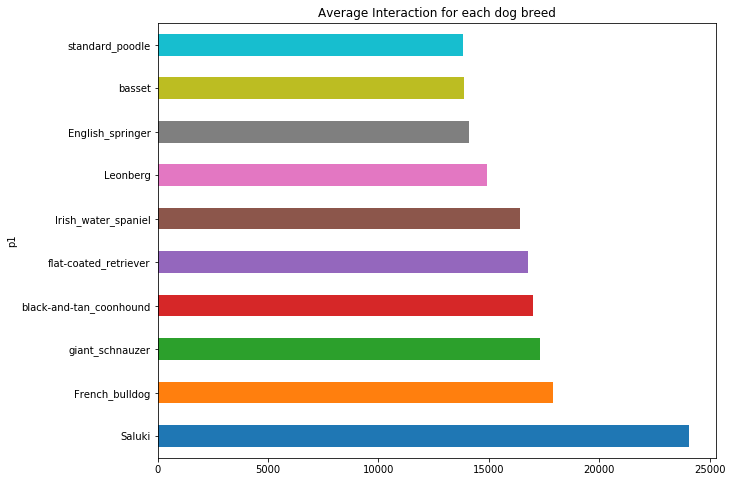

In [64]:
df_liked.query('p1_dog== True').\
                groupby('p1')['favorite_count'].mean()\
                .sort_values(ascending=False).\
                head(10).plot(kind= 'barh', figsize=(10,8), title= "Average Interaction for each dog breed");
              